# Projeto ecommerce
## Resumo

**Simulando que**, uma empresa de comercio eletrônico que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário. Os clientes entram na loja, têm sessões/reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em aplicativos móveis ou em seu site.

***
Será feita uma análise exploratória para extrair informações relevantes para responder em quais midias investir para  maior faturamento: app ou site.

E também um modelo preditivo para prever futuros lucros atuais baseado no historico dos clientes.
***

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
clientes = pd.read_csv("Ecommerce_Customers.csv")
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


***
### Traduzindo colunas

In [58]:
clientes.columns = ['email', 'endereco', 'avatar', 'duracao consulta estilista', 'tempo online app',
       'tempo online site', 'tempo de membro', 'valor anual gasto']

___
### Informações adicionais

In [59]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   email                       500 non-null    object 
 1   endereco                    500 non-null    object 
 2   avatar                      500 non-null    object 
 3   duracao consulta estilista  500 non-null    float64
 4   tempo online app            500 non-null    float64
 5   tempo online site           500 non-null    float64
 6   tempo de membro             500 non-null    float64
 7   valor anual gasto           500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Tendo uma visão geral das colunas que possam conter uma correlação para as próximas análises

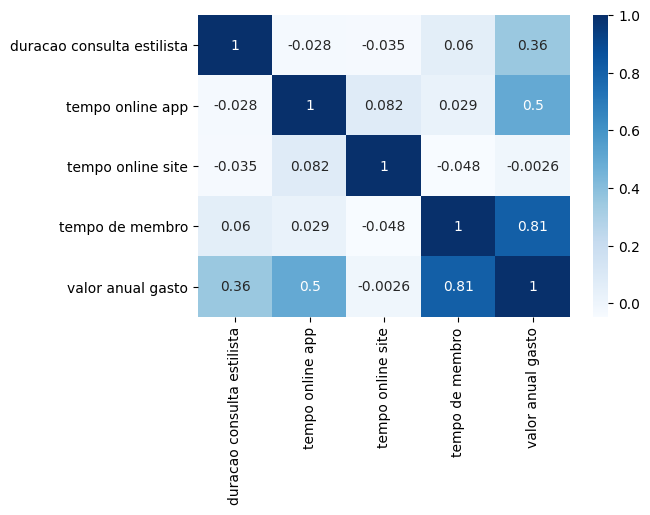

In [60]:
plt.figure(dpi=100)
sns.heatmap(clientes.corr(), cmap="Blues", annot=True)
plt.show()

#### OBS:
***

### Verificando se as correlações são Lineares

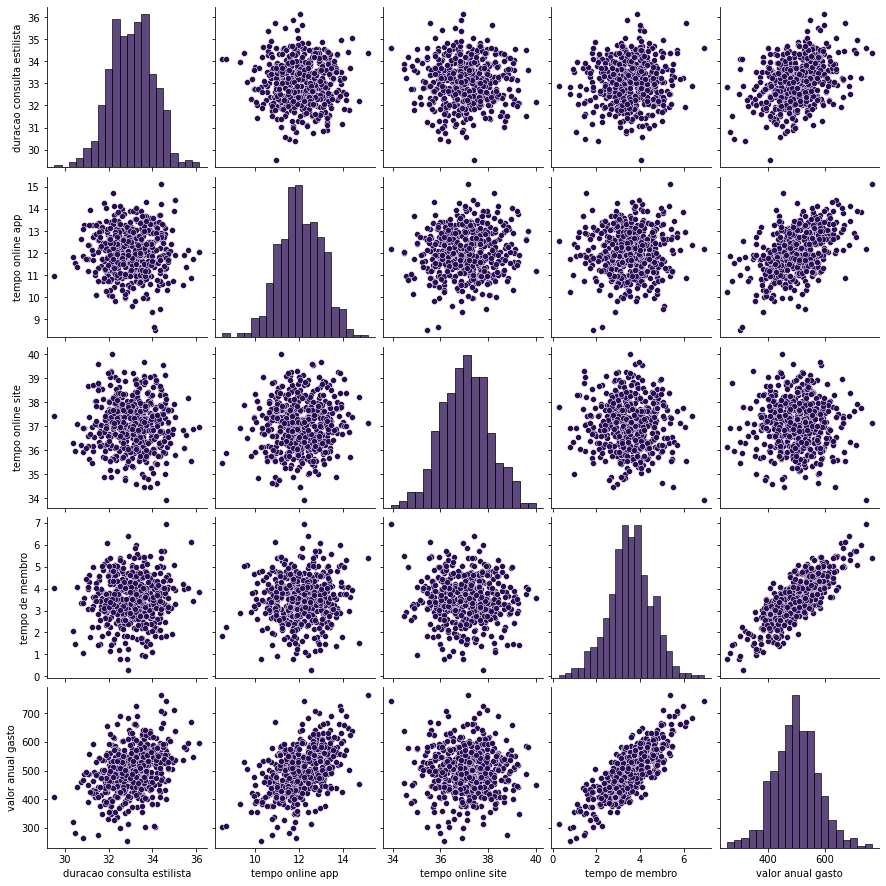

In [61]:
sns.pairplot(clientes)

#### OBS: É observado que o valor anual gasto tem uma considerável correlação linear com o tempo de membro
***

***
# **Analisando as correlações detectadas de forma mais detalhada**
***

### Visualizando a correlação entre valor gasto pelo cliente por ano, e quanto tempo ele é membro



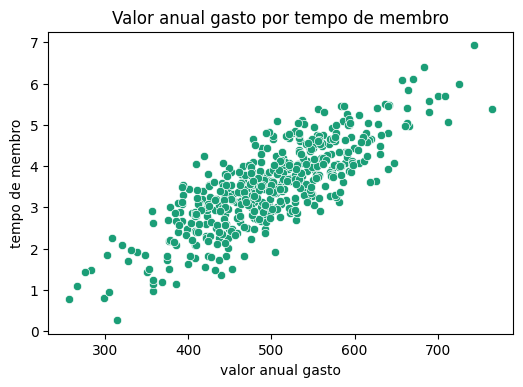

In [62]:
plt.figure(dpi=100)
sns.set_palette("Dark2")
plt.title("Valor anual gasto por tempo de membro")
sns.scatterplot(x=clientes['valor anual gasto'], y=clientes['tempo de membro'])
plt.show()

#### OBS: É observado que não há uma correlação significativa entre o tempo que as pessoas passam no site com o quanto que elas gastam

#### OBS 2: Também podemos observar que as pessoas gastam em media 37 minutos visualizando o site.
***

### Visualizando a correlação entre valor gasto pelo cliente por ano, e quanto tempo em media ele passa olhando o **aplicativo**

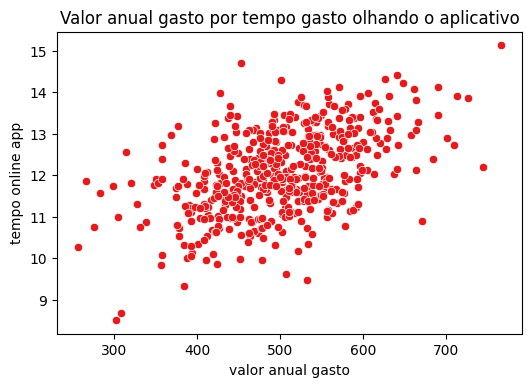

In [63]:
plt.figure(dpi=100)
sns.set_palette("Set1")
plt.title("Valor anual gasto por tempo gasto olhando o aplicativo")
sns.scatterplot(x=clientes['valor anual gasto'], y=clientes['tempo online app'])
plt.show()

#### OBS: Neste exemplo podemos ver que existe uma boa correlação linear entre a quantidade que as pessoas gastam na loja com o tempo que elas passam no aplicativo

#### OBS 2: Observamos que as pessoas passam menos tempo no aplicativo que no site, porém, quanto mais tempo elas passam no aplicativo, mais elas compram, consequentemente gastam mais

***
###  Visualidando a correlação entre tempo que as pessoas passam no app e o tempo que elas sao clientes da loja

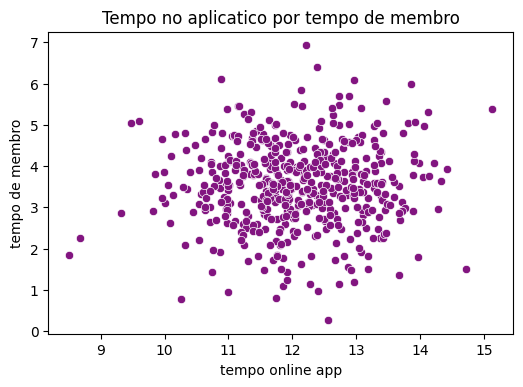

In [64]:
plt.figure(dpi=100)
sns.set_palette("BuPu_r")
plt.title("Tempo no aplicatico por tempo de membro")
sns.scatterplot(y=clientes['tempo de membro'], x=clientes['tempo online app'])
plt.show()

### A maior correlaçao entre as colunas valor anual gasto e tempo de membro possuem uma considerável correlação linear o suficiente para adotar o modelo Linear Regression

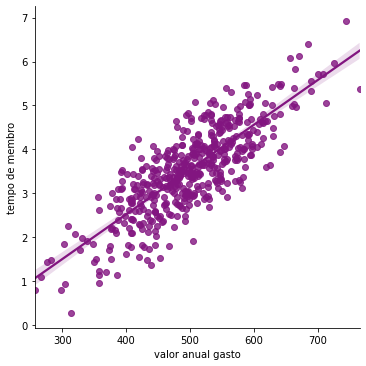

In [65]:
sns.lmplot(x='valor anual gasto', y='tempo de membro',data=clientes)

***
# **Preparando os dados para inicio do modelo**
Eliminando colunas, deixando apenas as numericas para a construção **deste modelo específico**

In [66]:
clientes = clientes.iloc[:,3:]

# Treinando e testando os dados


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [68]:
X = clientes.iloc[:,:-1]
y = clientes.iloc[:,[-1]]

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predição dos dados

In [71]:
predicao = lm.predict(Xtest)

### Avaliando precisão do modelo

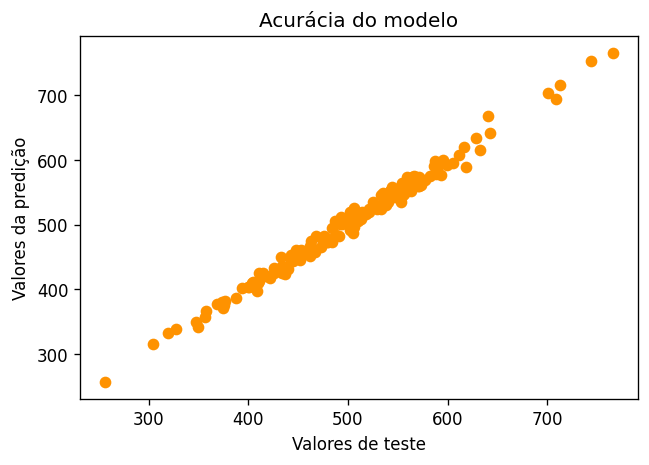

In [72]:
plt.figure(dpi=120)
sns.set_palette("Wistia_r")
plt.title("Acurácia do modelo")
plt.xlabel("Valores de teste")
plt.ylabel("Valores da predição")
plt.scatter(ytest, predicao)
plt.show()

#### OBS: O modelo tem uma proximidade considerável entre o **eixo x(valores de teste)** e o **eixo y(valores da predição)**

In [73]:
acuracia = lm.score(Xtest, ytest)
acuracia

print(f"{acuracia * 100:.0f}% de chance de acerto")

99% de chance de acerto


### OBS: Precisão do modelo de 99%, o que não é bom para um resultado primário

# Avaliando desempenho do Modelo

### Verificando margem de erros

In [74]:
rmse = np.sqrt(metrics.mean_squared_error(ytest, predicao))
rmse

8.933815066978626

#### OBS: a margem de erro é de apenas 9, podendo errar 9 para cima ou para baixo
***

# **Conclusão**

### Baseado nos gráficos e resultados adquiridos, foi comprovado que a empresa lucra mais com seu app, então seria mais vantajoso em conseguir mais membros através do app para gerar mais lucros, também foi verificado que os clientes mais antigos costumam consumir mais durante o ano.
***